#PROJETO - DIABETES

##DATASET DO PROJETO

##Pima Indians Diabetes Database

###Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

###Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

##Tradução

###Contexto

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases).
O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas nos dados.
Várias restrições foram aplicadas na seleção dessas instâncias a partir de um banco de dados maior.
Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade e de origem indígena Pima.

###Conteúdo

O conjunto de dados consiste em várias variáveis preditoras médicas e uma variável alvo chamada Outcome.
As variáveis preditoras incluem o número de gestações que a paciente teve, seu IMC (Índice de Massa Corporal), nível de insulina, idade, entre outros fatores.

##Fonte dos Dados

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

##Import das bibliotecas utilizadas e Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')

##Vizualização inicial e estatítsicas descritivas

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


##Limpeza e Diagnóstico

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Remover os valores "0" onde não é possível haver o mesmo, como em 'BloodPressure', 'Glucose', 'BMI'

In [11]:
df.drop(df[df['BloodPressure']==0].index, inplace = True)

In [12]:
df.drop(df[df['Glucose']==0].index, inplace=True)

In [13]:
df.drop(df[df['BMI']==0].index, inplace=True)

In [14]:
(df==0).sum()

,0
Pregnancies,99
Glucose,0
BloodPressure,0
SkinThickness,192
Insulin,332
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,475


##Distribuição de Frequência

O primeiro passo será fazer uma análise do comportamento das variáveis. Como primeira análise, podemos perceber que são todas variáveis quantitativas. Utilizaremos técnicas estatísticas de análise das DISTRIBUIÇÕES DE FREQUÊNCIA e HISTOGRAMAS para podermos avaliar a forma como as variáveis se distribuem.

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.Age.min()

21

In [17]:
df.Age.max()

81

In [18]:
classes = [0, 21, 41, 61, 81]
labels = ['0 - 21', '21 - 41', '41 - 61', '61 - 81']

In [19]:
frequencia = pd.value_counts(
    pd.cut(x = df.Age,
           bins = classes,
           labels = labels,
           include_lowest= True)
)
frequencia

<ipython-input-19-3548105955>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


,count
Age,
21 - 41,498
41 - 61,144
0 - 21,59
61 - 81,23


In [20]:
percentual = pd.value_counts(
    pd.cut(x = df.Age,
            bins = classes,
            labels = labels,
            include_lowest = True),
    normalize = True
)
percentual

<ipython-input-20-3107026736>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


,proportion
Age,
21 - 41,0.687845
41 - 61,0.198895
0 - 21,0.081492
61 - 81,0.031768


In [21]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual*100})
dist_freq.sort_index(ascending=True)

,Frequência,Porcentagem(%)
Age,,
0 - 21,59,8.149171
21 - 41,498,68.784530
41 - 61,144,19.889503
61 - 81,23,3.176796


<Axes: xlabel='Age'>

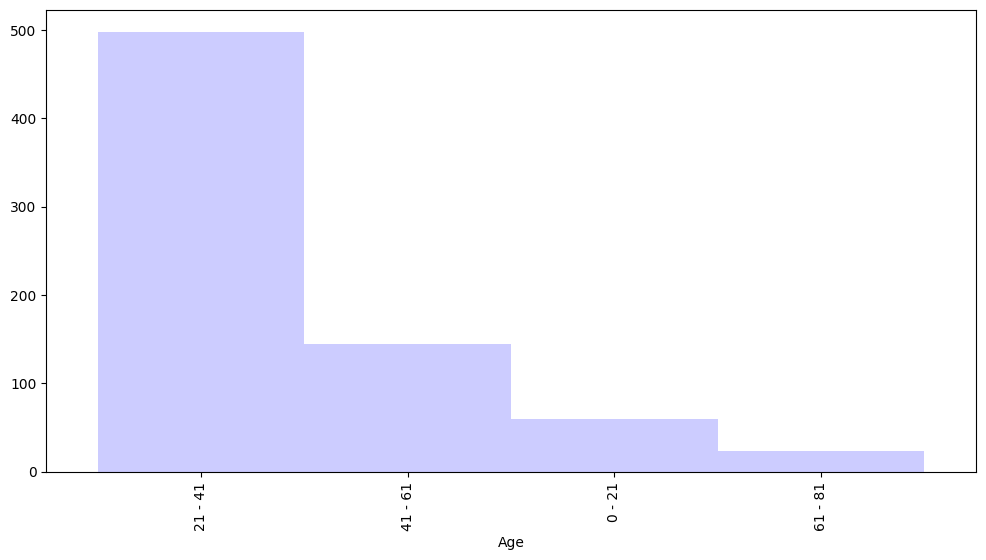

In [22]:
dist_freq['Frequência'].plot.bar(width= 1, color = 'blue', alpha = 0.2, figsize=(12, 6))

In [23]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.320000,111.016842,70.907368,20.395789,72.176842,30.974947,0.430297,31.258947
1,4.907631,142.610442,75.248996,23.441767,107.991968,35.313655,0.559594,37.341365


##Medidas de Tendência Central e Desvio Padrão

##Média

In [24]:
df.mean()

,0
Pregnancies,3.866022
Glucose,121.882597
BloodPressure,72.400552
SkinThickness,21.443370
Insulin,84.494475
BMI,32.467127
DiabetesPedigreeFunction,0.474765
Age,33.350829
Outcome,0.343923


##Mediana

In [25]:
df.median()

,0
Pregnancies,3.000
Glucose,117.000
BloodPressure,72.000
SkinThickness,24.000
Insulin,48.000
BMI,32.400
DiabetesPedigreeFunction,0.379
Age,29.000
Outcome,0.000


##Moda

In [26]:
df.Age.mode()

,Age
0,22


In [27]:
df.BMI.mode()

,BMI
0,31.2
1,31.6
2,32.0


In [28]:
df.Pregnancies.mode()

,Pregnancies
0,1


In [29]:
df.Outcome.mode()

,Outcome
0,0


In [30]:
df.DiabetesPedigreeFunction.mode()

,DiabetesPedigreeFunction
0,0.254
1,0.258


##Relação entre média, mediana e moda

###Variável Age

<ipython-input-31-622042084>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

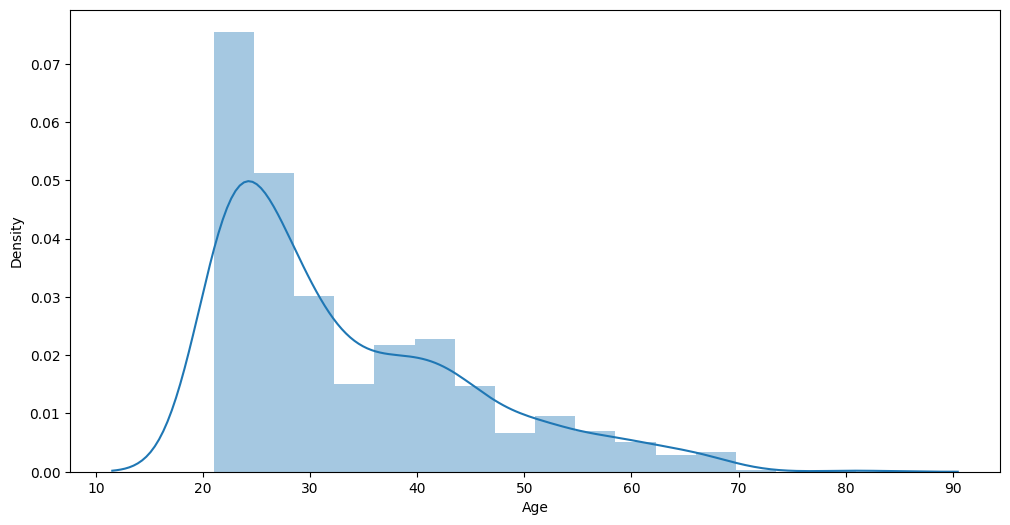

In [31]:
ax = sns.distplot(df.Age)
ax.figure.set_size_inches(12,6)
ax

###Variável BMI

<ipython-input-32-1950486494>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

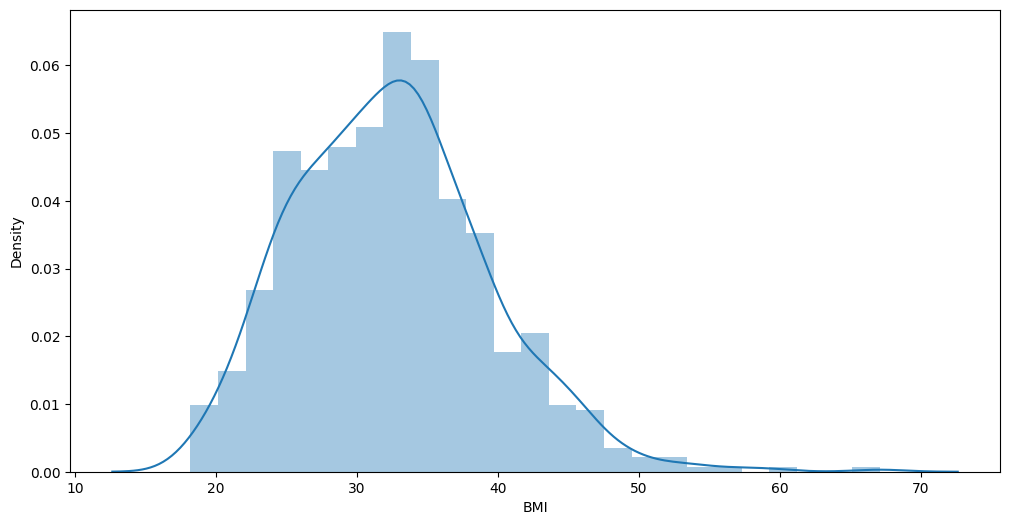

In [32]:
ax = sns.distplot(df.BMI)
ax.figure.set_size_inches(12,6)
ax

###Variável Diabestes Pedigree Function

<ipython-input-33-3206804934>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax =sns.distplot(df.DiabetesPedigreeFunction)


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

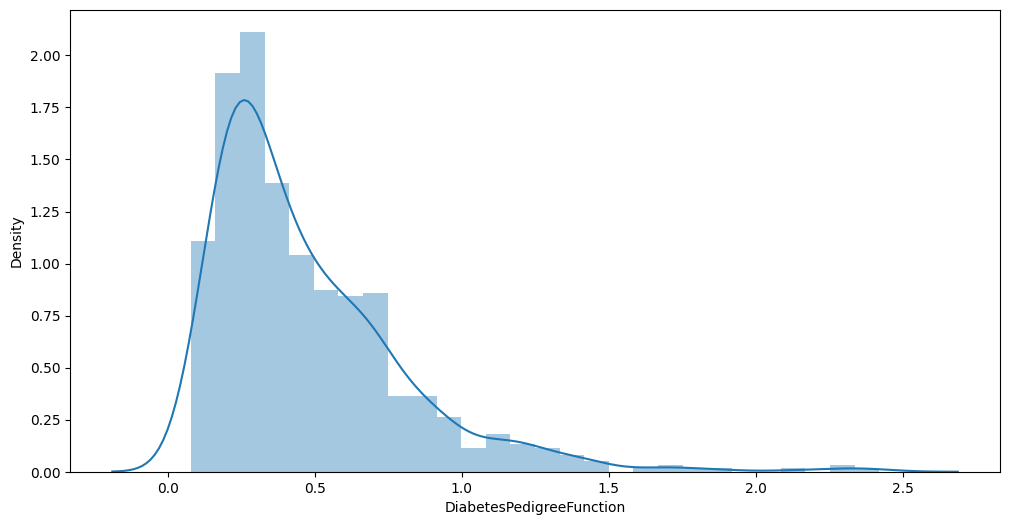

In [33]:
ax =sns.distplot(df.DiabetesPedigreeFunction)
ax.figure.set_size_inches(12,6)
ax

##Desvio Padrão

In [34]:
df.std()

,0
Pregnancies,3.362803
Glucose,30.750030
BloodPressure,12.379870
SkinThickness,15.732756
Insulin,117.016513
BMI,6.888941
DiabetesPedigreeFunction,0.332315
Age,11.765393
Outcome,0.475344


## Vizualizações com Insights

<Axes: xlabel='Outcome', ylabel='Glucose'>

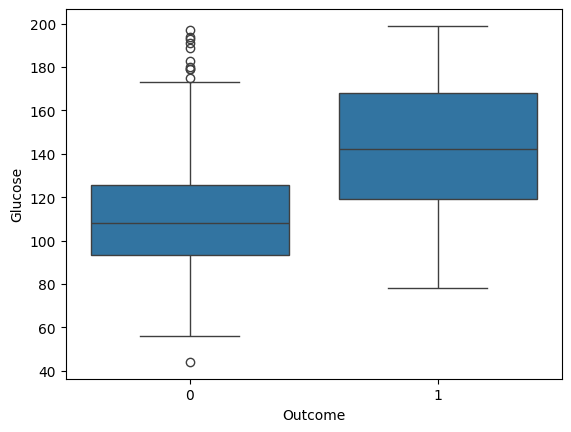

In [36]:
sns.boxplot(x='Outcome', y = 'Glucose', data = df)


<Axes: >

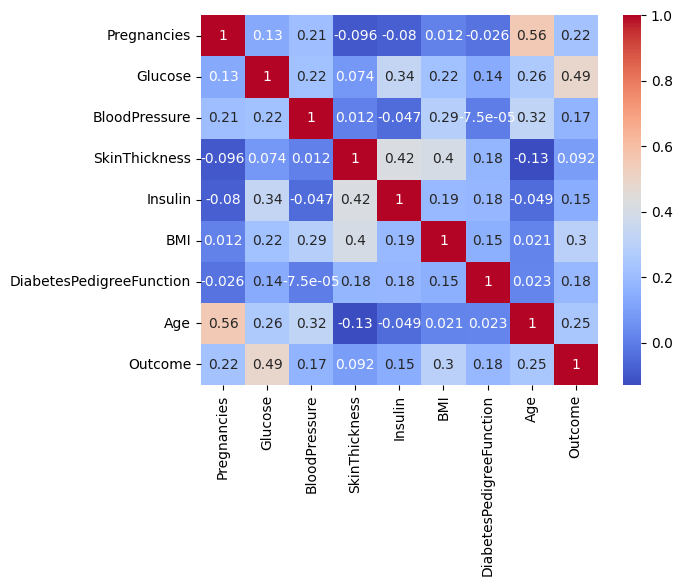

In [37]:
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

###Análise das variáveis

Boxplot: Vimos que não há outliers relevantes na relação de Outcome com Glicose

Correlação: já no gráfico de correlação, podemos ver algumas variáveis que têm maior correlação com o Outcome(diagnóstico), mas nenhuma muito influente. Dentre as maiores relações com o Outcome, podemos pontuar como relevante apenas a Glicose.

##Modelo de Machine Learning

###Imports

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [41]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

###Dividindo em treino e teste

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

###Padronizando os Dados

In [75]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

###Random Forest

In [76]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

###Avaliando Modelo

In [77]:
y_pred = model.predict(x_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.8


In [78]:
print(confusion_matrix(y_test, y_pred))


[[87 15]
 [14 29]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       102
           1       0.66      0.67      0.67        43

    accuracy                           0.80       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.80      0.80      0.80       145



###Display De Análise

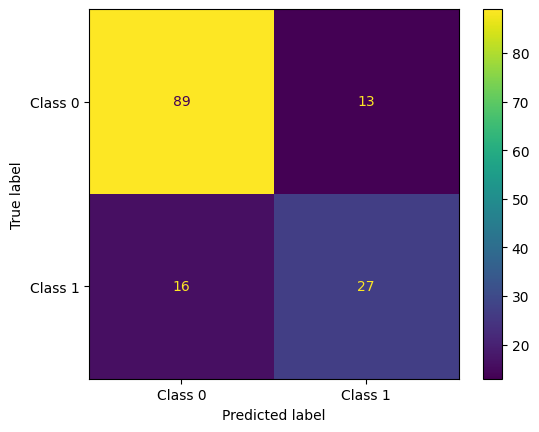

In [103]:
cfm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=['Class 0', 'Class 1'])
disp.plot()

###XGBOOST

In [80]:
import xgboost as xgb

In [106]:
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

###Avaliando Modelo

In [104]:
y_pred = model.predict(x_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)

In [84]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.7931034482758621


###Display De Análise

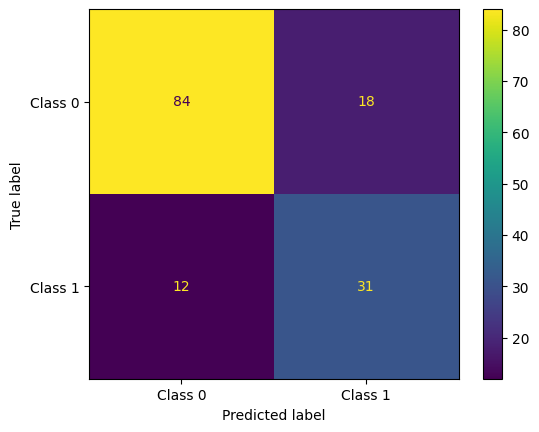

In [107]:
cfm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=['Class 0', 'Class 1'])
disp.plot()

###KNeighbors

###Display De Análise

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7172413793103448


###Display De Análise

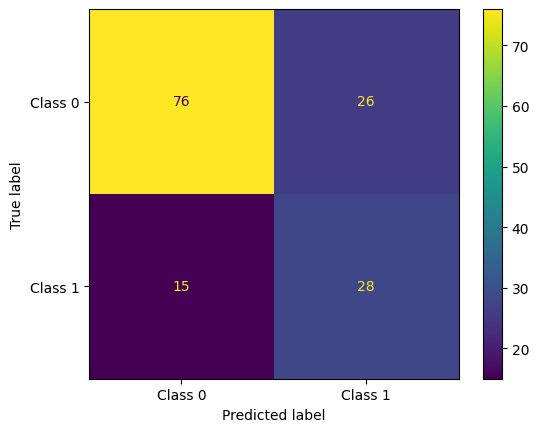

In [109]:
cfm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=['Class 0', 'Class 1'])
disp.plot()

###Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [110]:
logreg = LogisticRegression(random_state=16)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8


###Display De Análise

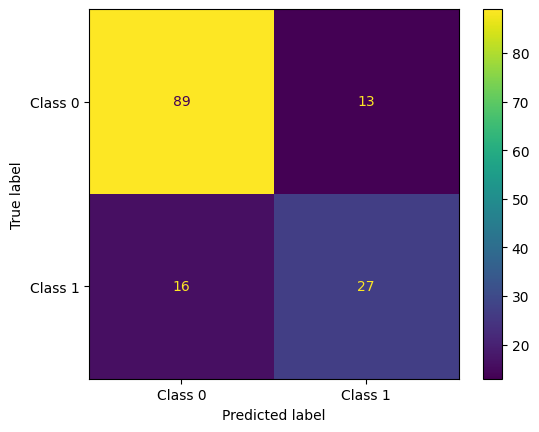

In [111]:
cfm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=['Class 0', 'Class 1'])
disp.plot()

##Conclusão

Os modelos de ML utilizados obtiveram 80% de acurácia, com mais dados clínicos, o modelo pode melhorar.

As variáveis Glucose (Glicose) e BMI (IMC) foram as mais importantes para o diganóstico, as variáveis que têm mais correlação.